In [77]:
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [11]:
!curl https://s3.amazonaws.com/tripdata/201807-citibike-tripdata.csv.zip > citibike201807.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60.2M  100 60.2M    0     0  41.3M      0  0:00:01  0:00:01 --:--:-- 41.3M


In [4]:
# ove the downloaded data to PUI data
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/ys3226/PUIdata


In [5]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ys3226/PUIDATA


In [12]:
# move the data
!mv citibike201807.zip $PUIDATA

In [13]:
#test if the data is there
!ls $PUIDATA

citibike201807.csv  citibike201807.zip	citybike.zip


In [14]:
cb201807 = pd.read_csv("%s/citibike201807.zip"%os.getenv("PUIDATA"))

In [17]:
cb201807.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,500,2018-07-01 00:33:51.2640,2018-07-01 00:42:12.0280,72,W 52 St & 11 Ave,40.767272,-73.993929,3236,W 42 St & Dyer Ave,40.758985,-73.993800,16583,Subscriber,1981,1
1,455,2018-07-01 02:06:54.0270,2018-07-01 02:14:29.0900,72,W 52 St & 11 Ave,40.767272,-73.993929,529,W 42 St & 8 Ave,40.757570,-73.990985,31481,Subscriber,1988,1
2,1080,2018-07-01 02:09:16.4640,2018-07-01 02:27:17.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,25004,Subscriber,1982,2
3,632,2018-07-01 02:55:04.5870,2018-07-01 03:05:36.7910,72,W 52 St & 11 Ave,40.767272,-73.993929,465,Broadway & W 41 St,40.755136,-73.986580,25867,Subscriber,1986,1
4,1676,2018-07-01 03:24:27.4350,2018-07-01 03:52:23.7760,72,W 52 St & 11 Ave,40.767272,-73.993929,3425,2 Ave & E 104 St,40.789210,-73.943708,31351,Subscriber,1992,1


# IDEA:

## Customers are more likely than subscribers to use citibike between two peak commute hours (from 10am to 4pm)

# NULL HYPOTHESIS

## The proportion of subscribers using citibike between commute hours is the same or higher than the proportion of customers using citibike between commute hours.

In [20]:
cb201807.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [148]:
#check the general count for two different usertype
cb201807['usertype'].value_counts()

Subscriber    1628746
Customer       284879
Name: usertype, dtype: int64

Convert the datetime creating the usehour variable to understand bike usage in each discrete hours.

In [73]:
cb201807['usehour'] = pd.to_datetime(cb201807['starttime']).dt.hour

In [74]:
cb201807.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'usehour', 'date'],
      dtype='object')

In [75]:
cb201807.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender', 'date'], axis=1, inplace=True)

In [117]:
cb201807.head()

,usertype,usehour
0,Subscriber,0
1,Subscriber,2
2,Subscriber,2
3,Subscriber,2
4,Subscriber,3


Create a pivot table to quantify bike usage by hours between two different user type

In [118]:
pivot = cb201807.groupby(['usehour', 'usertype'])['usertype'].count().unstack()

In [119]:
pivot.head()

usertype,Customer,Subscriber
usehour,,
0,3172,15428
1,1862,8546
2,1119,5014
3,632,2973
4,457,3305


In [127]:
pivot['Customer'].sum()

284879

Create percentage columns to be able to compare the usage difference in a regularized way.

In [133]:
pivot['cust_perc'] = pivot['Customer'] / pivot['Customer'].sum()
pivot['subs_perc'] = pivot['Subscriber'] / pivot['Subscriber'].sum()

In [134]:
pivot

usertype,Customer,Subscriber,cust_perc,subs_perc
usehour,,,,
0,3172,15428,0.011135,0.009472
1,1862,8546,0.006536,0.005247
2,1119,5014,0.003928,0.003078
3,632,2973,0.002218,0.001825
4,457,3305,0.001604,0.002029
5,621,11347,0.002180,0.006967
6,1495,37646,0.005248,0.023113
7,2828,75754,0.009927,0.046511
8,5807,133254,0.020384,0.081814


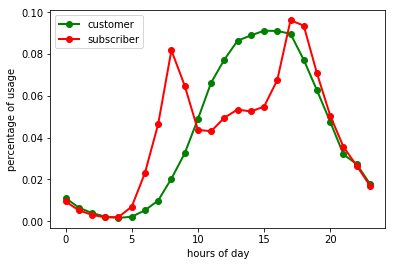

In [153]:
plt.plot(pivot.index, pivot.cust_perc, color='green', marker='.',  label='customer', linewidth=2, markersize=12)
plt.plot(pivot.index, pivot.subs_perc, color='red', marker='.', label= 'subscriber', linewidth=2, markersize=12)
plt.xlabel('hours of day')
plt.ylabel('percentage of usage')
plt.legend()
plt.show()

### Figure 1: Distributions of two different bike usage percentages(customer vs. subscriber) throughout the day